<a href="https://colab.research.google.com/github/rubenray/Vision-por-computadora-MAR/blob/main/Vision_Tema_II_Deteccion_y_Seguimineto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema II: Detección y Seguimiento de Objetos
Notebook de ejemplos en Python con OpenCV y modelos pre-entrenados.

In [1]:
# Instalación de librerías
!pip install opencv-python==4.9.0.80 numpy==1.26.4 matplotlib==3.8.3 ultralytics==8.1.0
!pip install ultralytics --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.2/699.2 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.12.0.88
    Uninstalling opencv-python-4.12.0.88:
      Successfully uninstalled opencv-python-4.12.0.88
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.0
    Uninstalling ultralytics-8.1.0:
      Successfully uninstalled ultralytics-8.1.0


## 1. Detección de objetos con YOLOv8


image 1/1 /content/imagen.jpeg: 448x640 1 person, 315.5ms
Speed: 5.9ms preprocess, 315.5ms inference, 36.7ms postprocess per image at shape (1, 3, 448, 640)


(-0.5, 274.5, 182.5, -0.5)

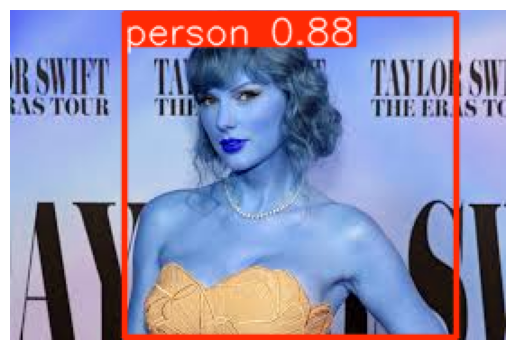

In [3]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from ultralytics.nn.tasks import DetectionModel
from ultralytics.nn.modules import Conv

torch.serialization.add_safe_globals([DetectionModel, torch.nn.modules.container.Sequential, Conv])

model = YOLO('yolov8n.pt')

img = '/content/imagen.jpeg'  # reemplazar
results = model(img)

res = results[0].plot()
plt.imshow(res)
plt.axis("off")

2. Detección con SSD (OpenCV)

(-0.5, 274.5, 182.5, -0.5)

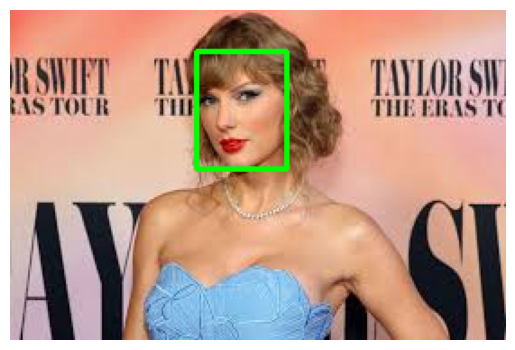

In [4]:
import cv2
import matplotlib.pyplot as plt

# Download the necessary model files
#!wget -q https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/deploy.prototxt
#!wget -q https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/res10_300x300_ssd_iter_140000.caffemodel

!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -q https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel




net=cv2.dnn.readNetFromCaffe('deploy.prototxt','res10_300x300_ssd_iter_140000.caffemodel')
img=cv2.imread('/content/imagen.jpeg')
h,w=img.shape[:2]
blob=cv2.dnn.blobFromImage(img,1.0,(300,300),(104,177,123))
net.setInput(blob)
detections=net.forward()

for i in range(detections.shape[2]):
    conf=detections[0,0,i,2]
    if conf>0.5:
        box=detections[0,0,i,3:7]*[w,h,w,h]
        x1,y1,x2,y2=box.astype(int)
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis("off")

3. Seguimiento con KLT (Lucas–Kanade)

In [5]:
import numpy as np
import urllib.request
import os

# Descargar un video de ejemplo corto
video_url = "https://www.learningcontainer.com/wp-content/uploads/2020/05/sample-mp4-file.mp4"
video_path = "/content/sample_video.mp4"

# Descargar el video
print("Descargando video de ejemplo...")
urllib.request.urlretrieve(video_url, video_path)

# Verificar que se descargó
if os.path.exists(video_path):
    print(f"Video descargado: {video_path}")
    print(f"Tamaño: {os.path.getsize(video_path) / (1024*1024):.2f} MB")
else:
    print("Error al descargar el video")

Descargando video de ejemplo...
Video descargado: /content/sample_video.mp4
Tamaño: 10.06 MB


In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture('/content/sample_video.mp4')

##Obtener propiedades del video original
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Configurar video de salida
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/output_video.mp4', fourcc, fps, (width, height))

ret, frame = cap.read()
old_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, 100, 0.3, 7)

lk_params = dict(winSize=(15,15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS|cv2.TERM_CRITERIA_COUNT,10,0.03))


frame2 = cap.read()
while True:
    ret, frame2 = cap.read()
    if not ret: break

    frame_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]

        for new, old in zip(good_new, good_old):
            x, y = new.ravel()
            cv2.circle(frame2, (int(x), int(y)), 3, (0, 255, 0), -1)

        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)

    # Escribir frame al video de salida
    out.write(frame2)

    # Mostrar progreso
   # cv2_imshow(frame2)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()
print("Video guardado como '/content/output_video.mp4'")

Video guardado como '/content/output_video.mp4'


4. Mean-Shift Tracking

In [8]:
import cv2
import numpy as np
import urllib.request
import os

# Crear o descargar el mismo video
def create_tracking_video():
    width, height = 640, 480
    video_path = "/content/tracking_demo.mp4"
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(video_path, fourcc, 10, (width, height))

    print("Creando video para Mean-Shift Tracking...")

    # Colores distintos para mejor seguimiento
    colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255), (255, 255, 0)]

    for i in range(100):  # 10 segundos
        frame = np.full((height, width, 3), 50, dtype=np.uint8)

        # Objetos con movimiento y colores distintos
        # Objeto 1 - Rectángulo rojo (movimiento lineal)
        x1 = int(100 + 4 * i)
        y1 = 150
        cv2.rectangle(frame, (x1, y1), (x1+60, y1+40), (0, 0, 255), -1)

        # Objeto 2 - Círculo azul (movimiento sinusoidal)
        x2 = 400
        y2 = int(200 + 80 * np.sin(i * 0.2))
        cv2.circle(frame, (x2, y2), 30, (255, 0, 0), -1)

        # Objeto 3 - Rectángulo verde (movimiento circular)
        x3 = int(300 + 100 * np.cos(i * 0.1))
        y3 = int(300 + 80 * np.sin(i * 0.1))
        cv2.rectangle(frame, (x3, y3), (x3+50, y3+50), (0, 255, 0), -1)

        cv2.putText(frame, "Mean-Shift Tracking Demo", (50, 50),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        out.write(frame)

    out.release()
    print(f"Video creado: {video_path}")
    return video_path

video_path = create_tracking_video()

Creando video para Mean-Shift Tracking...
Video creado: /content/tracking_demo.mp4


Iniciando Mean-Shift Tracking...


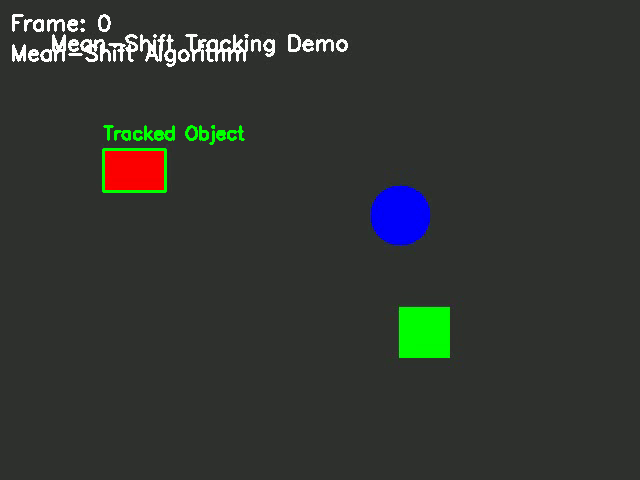

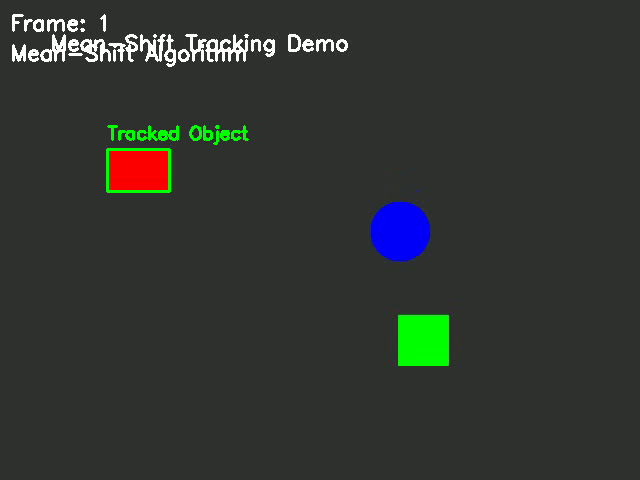

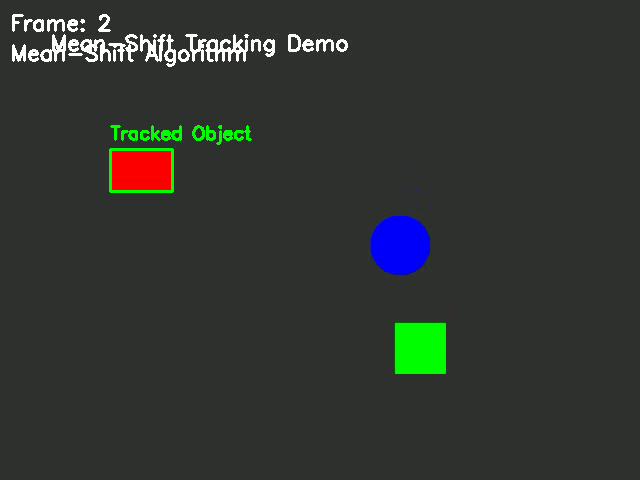

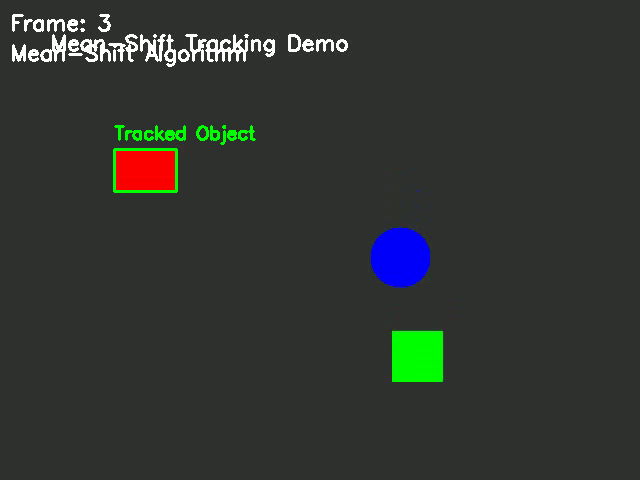

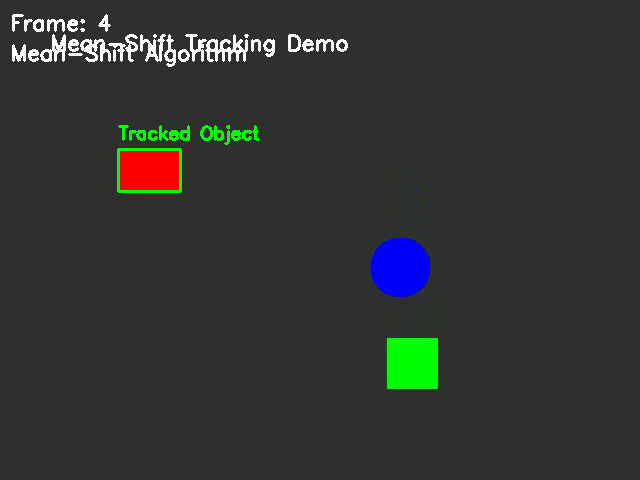

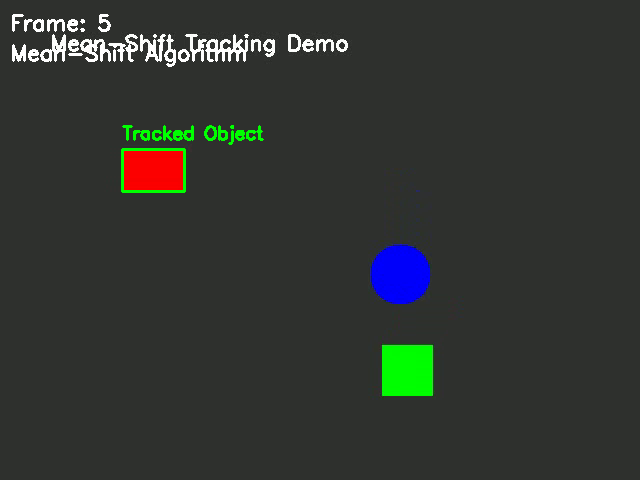

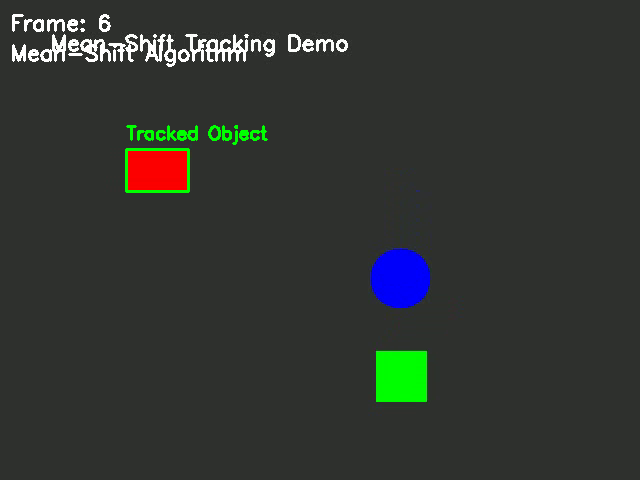

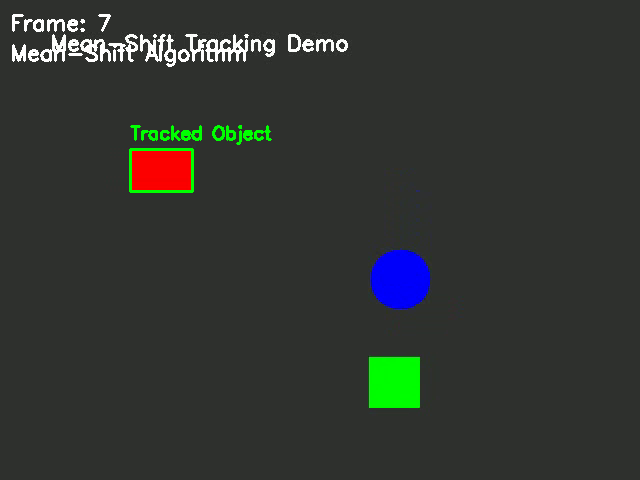

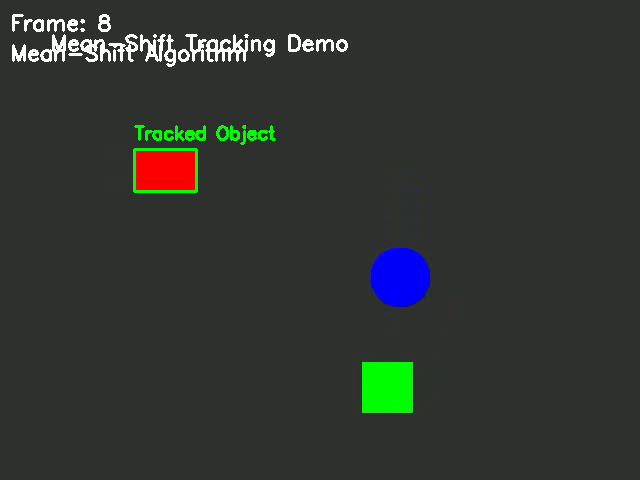

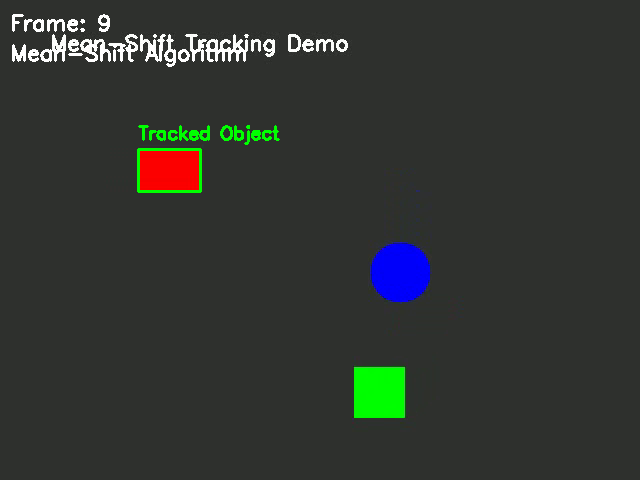

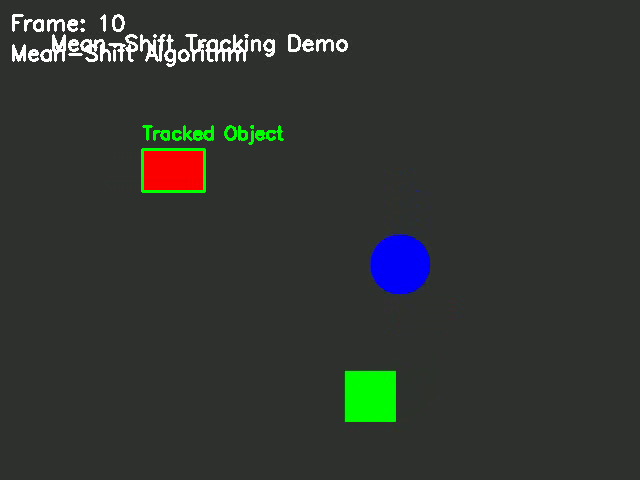

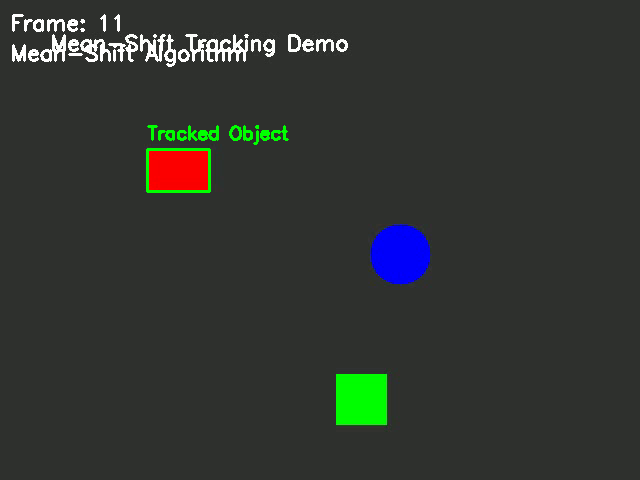

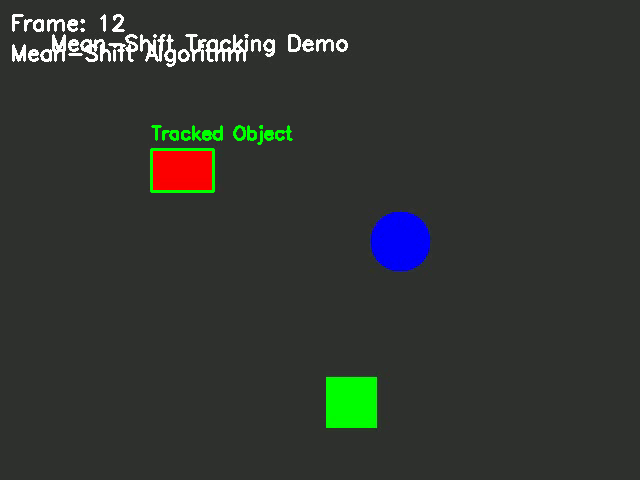

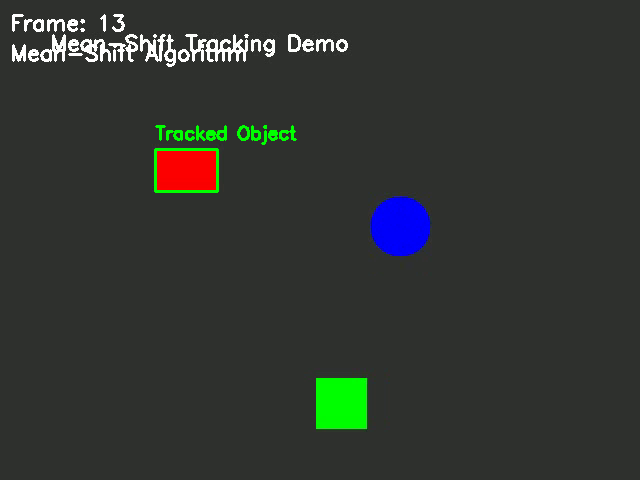

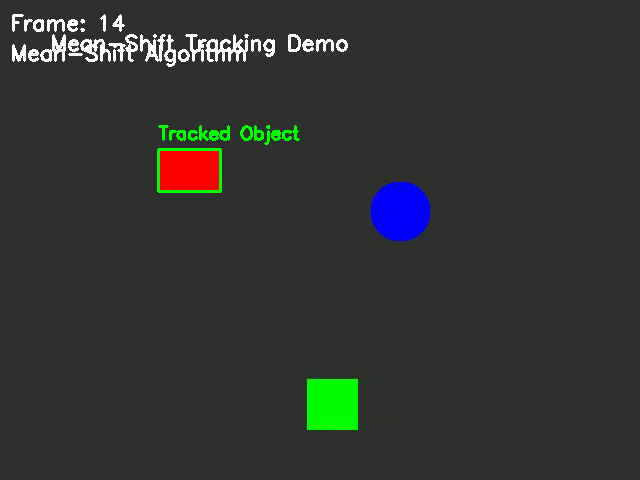

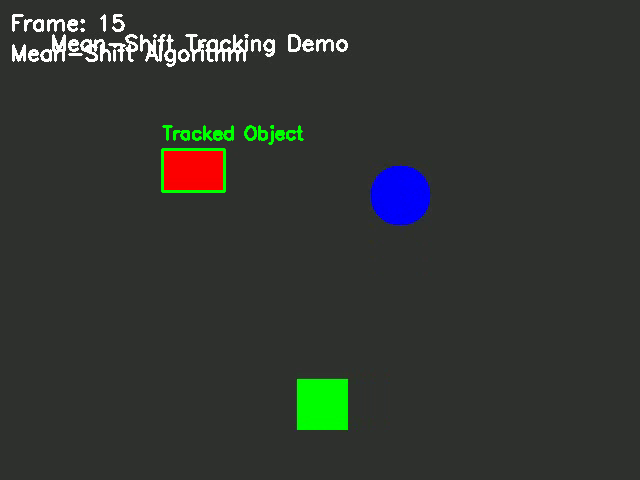

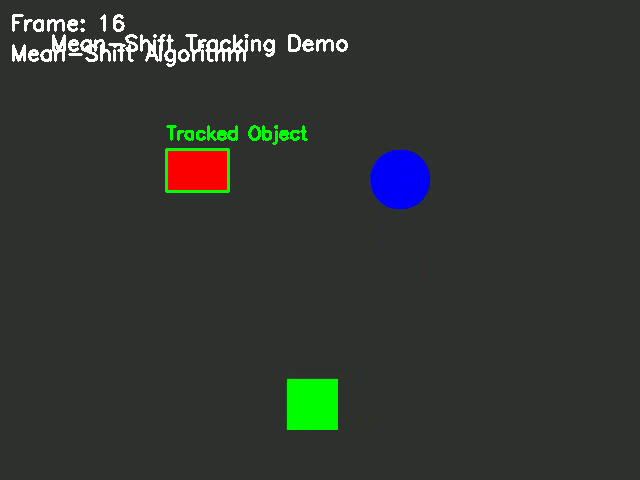

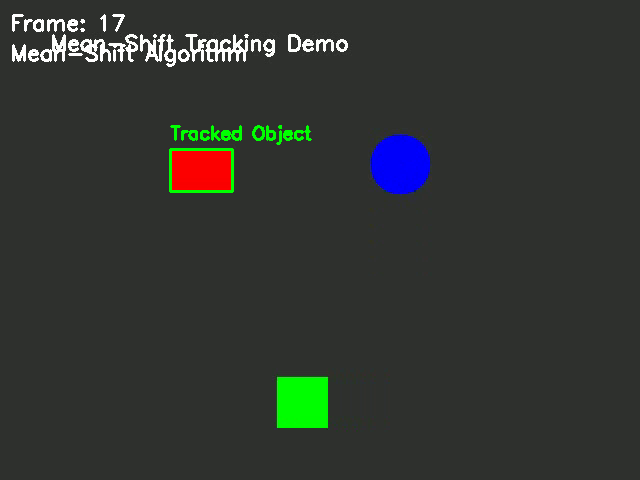

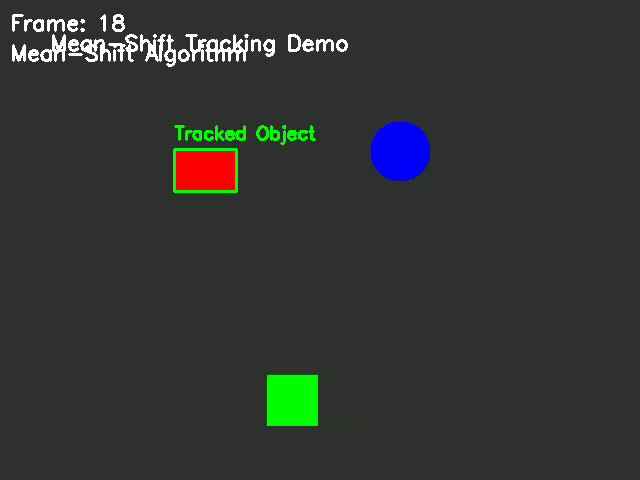

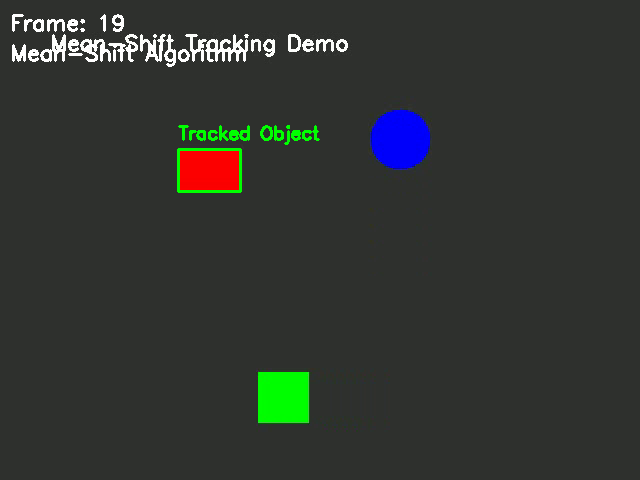

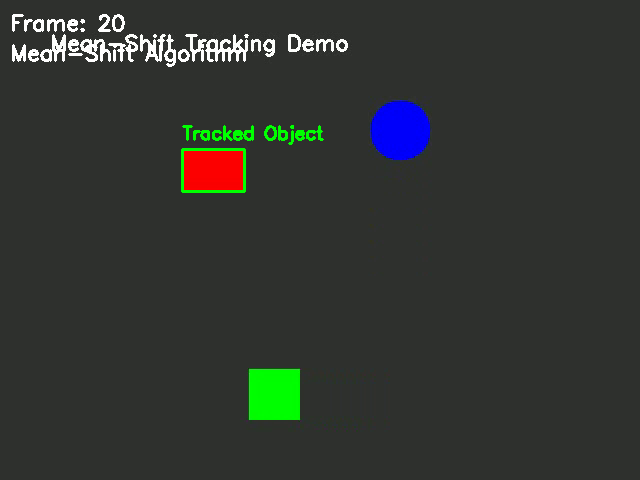

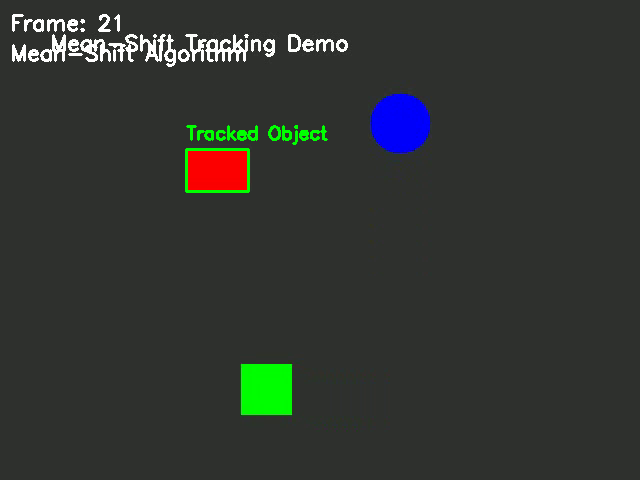

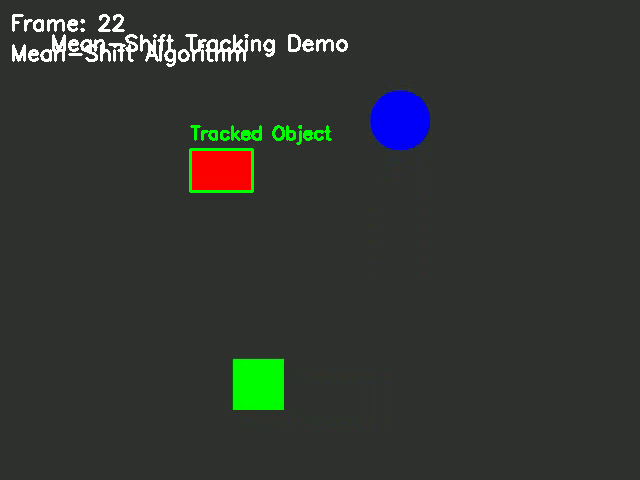

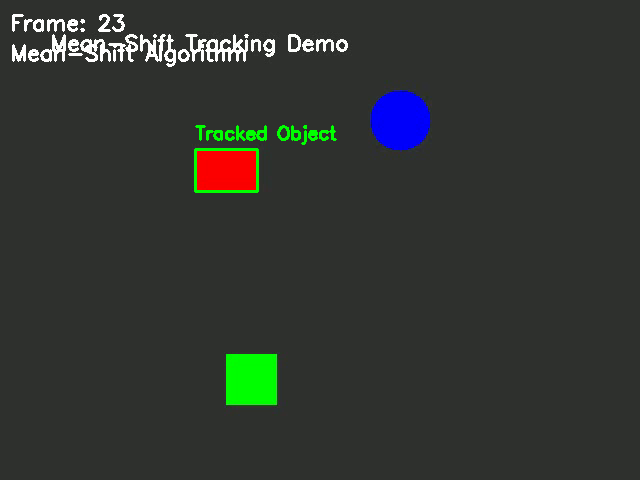

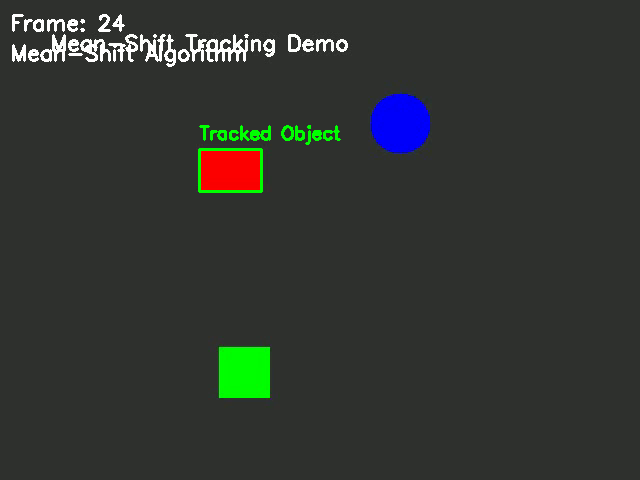

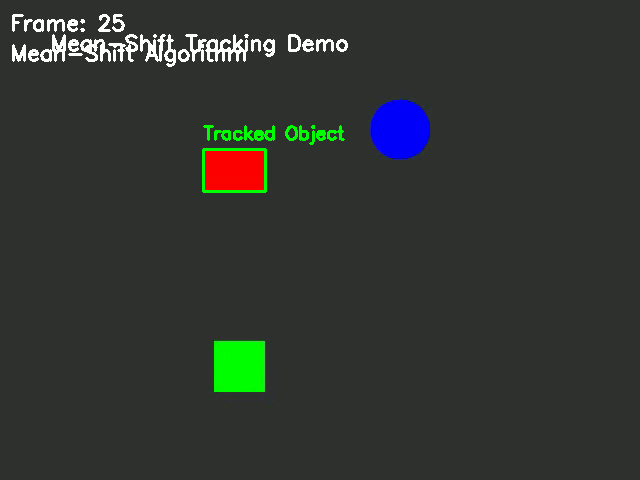

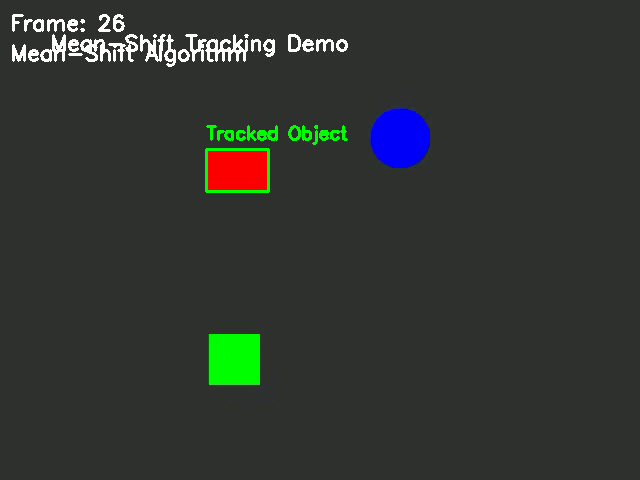

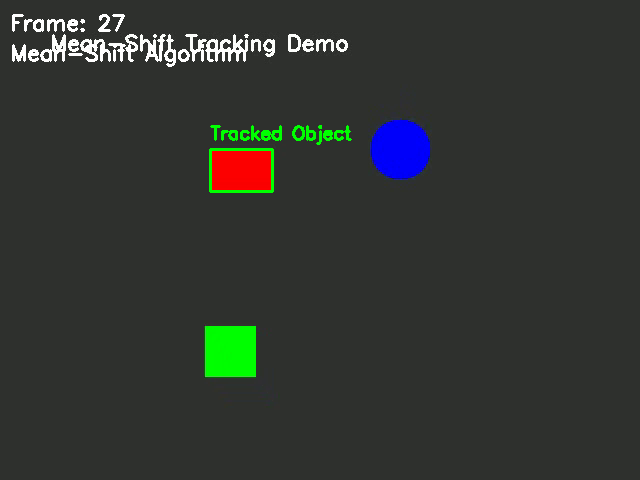

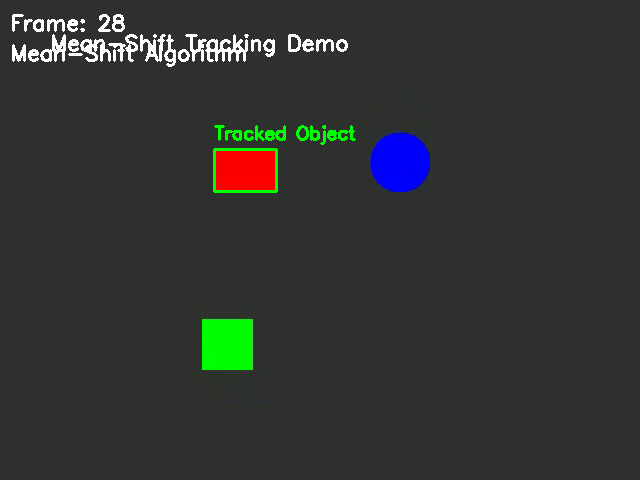

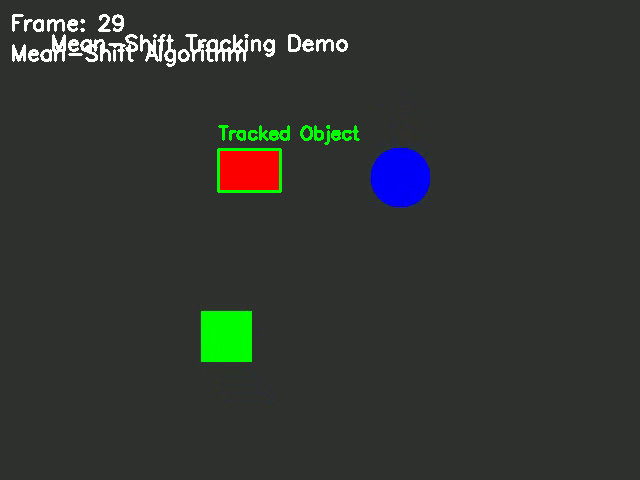

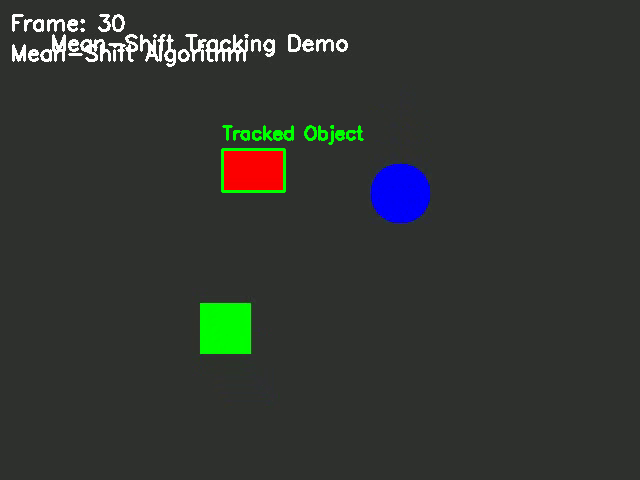

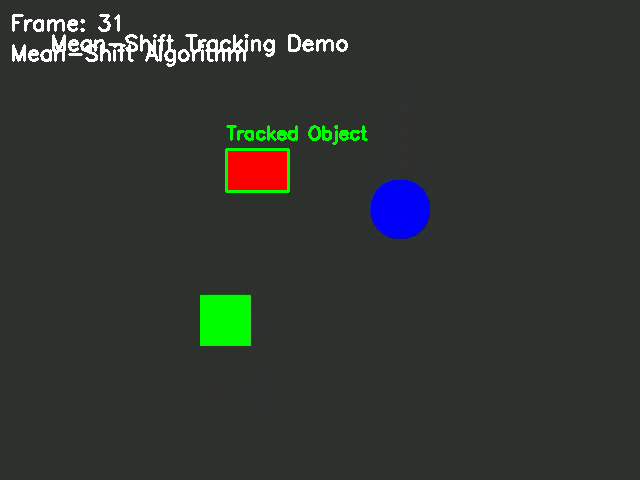

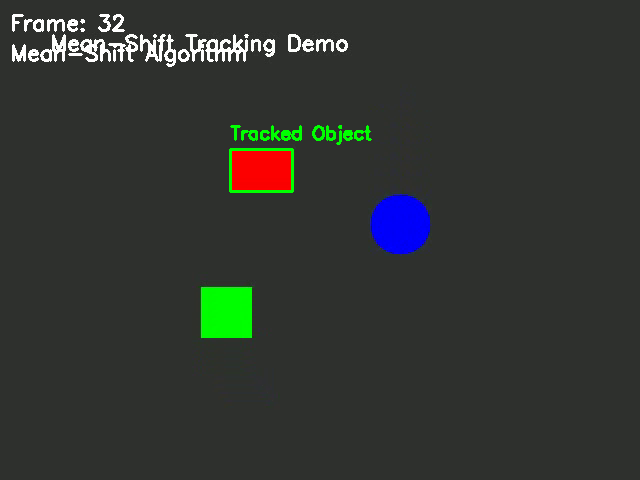

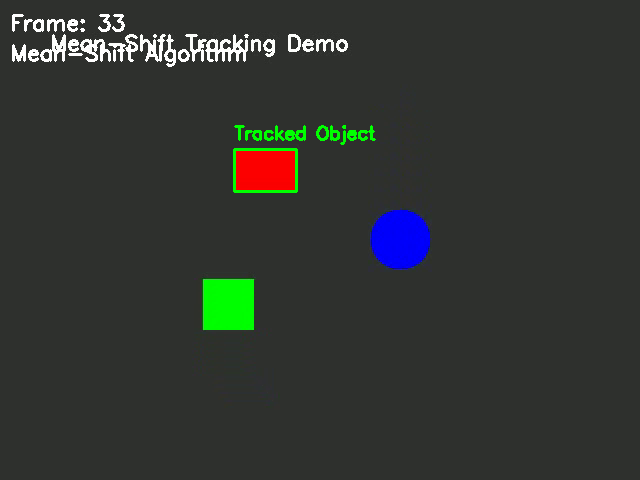

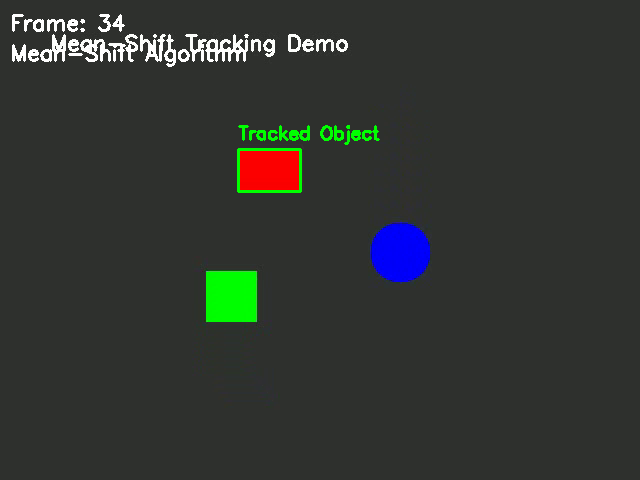

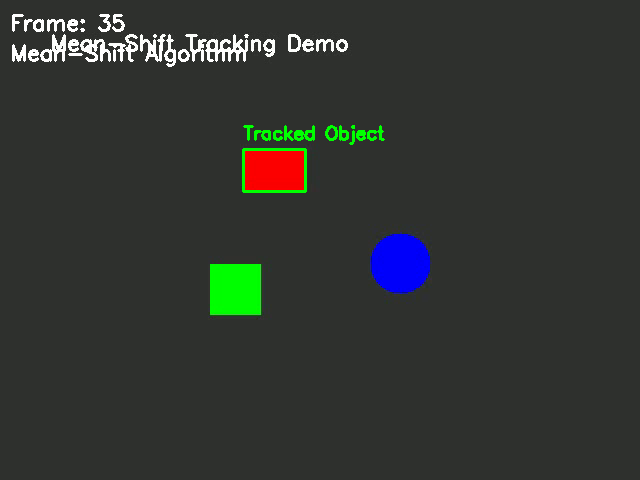

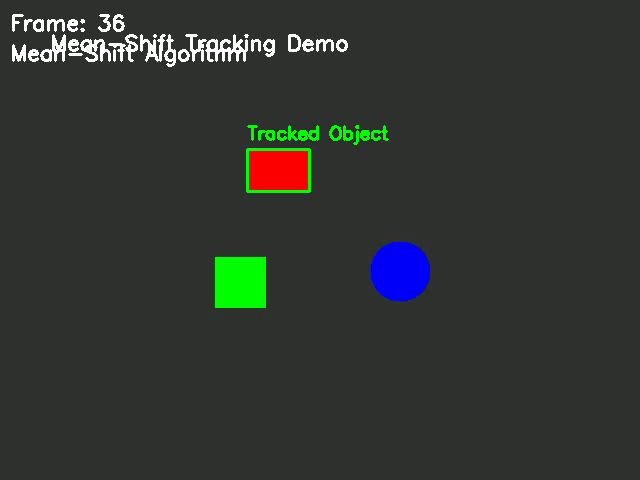

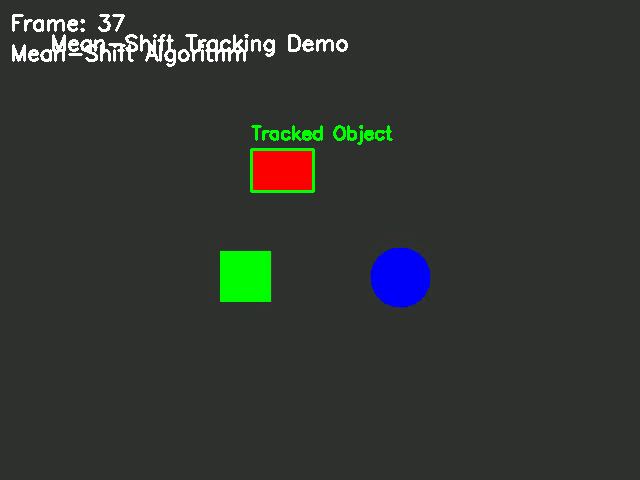

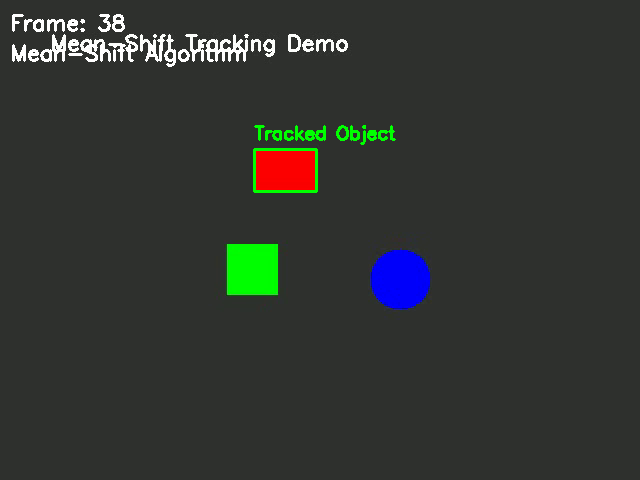

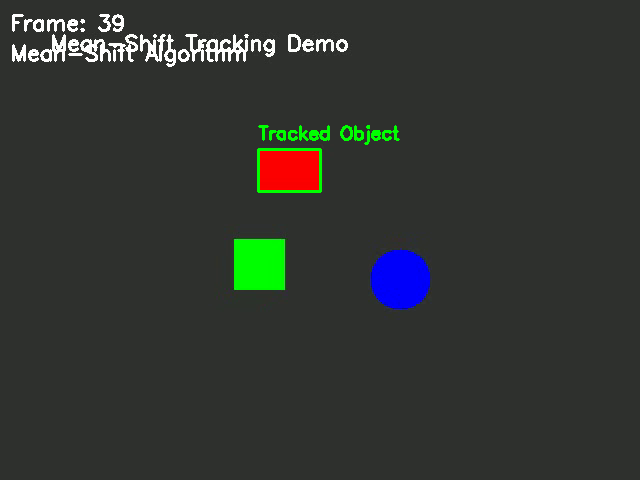

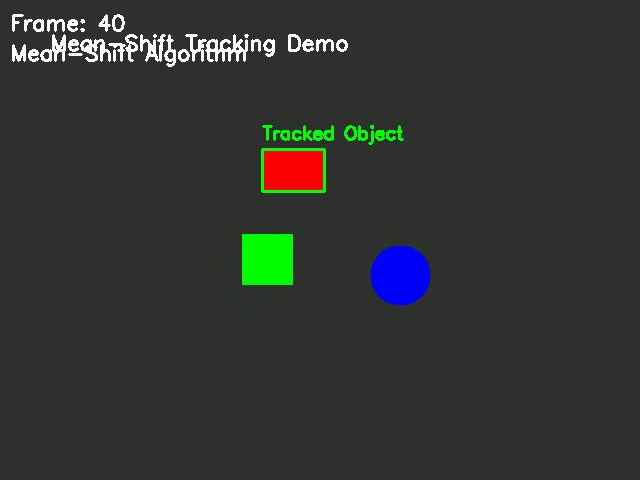

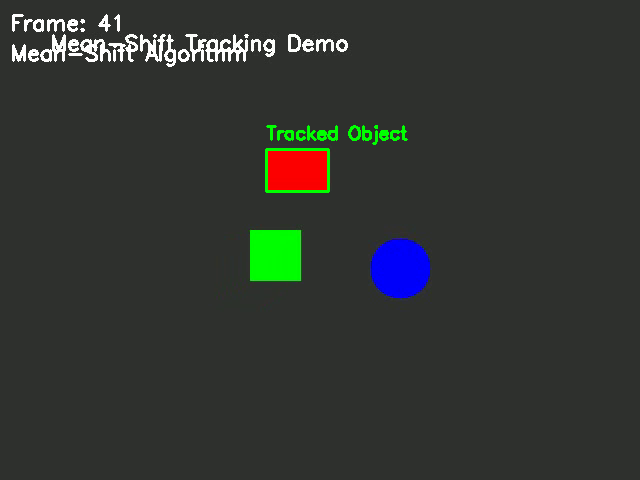

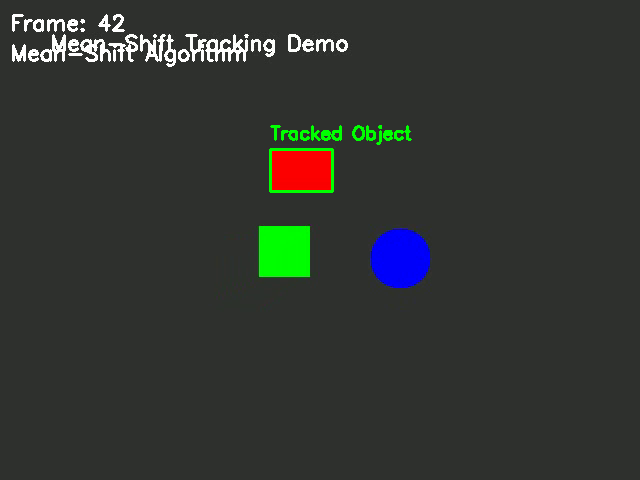

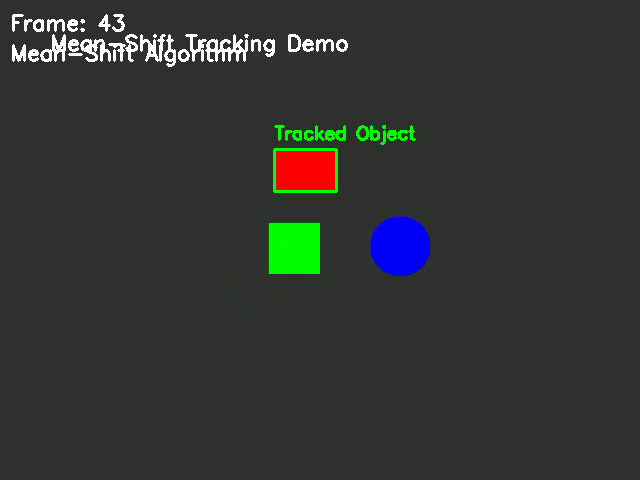

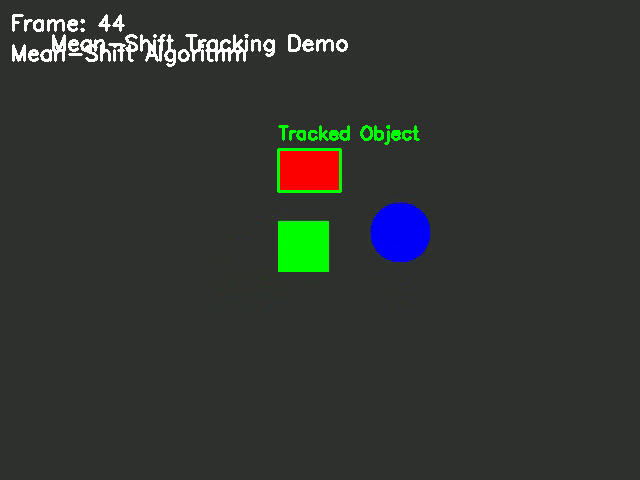

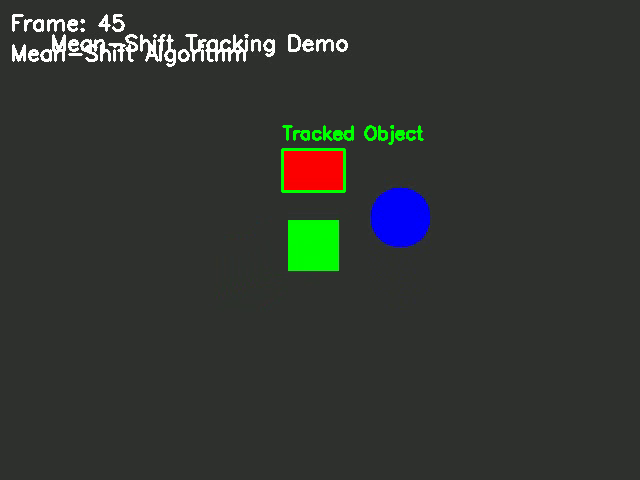

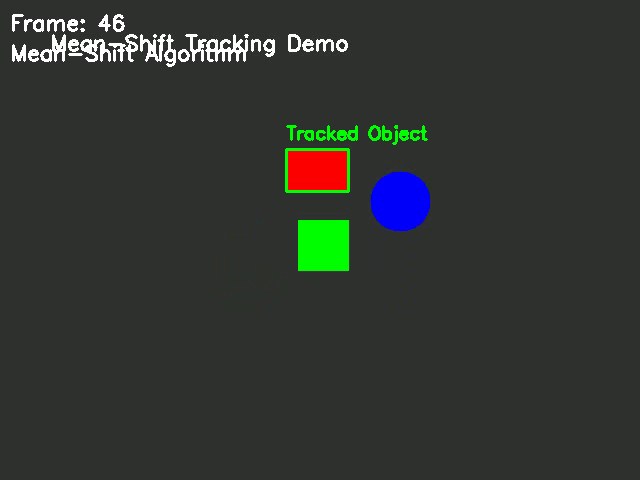

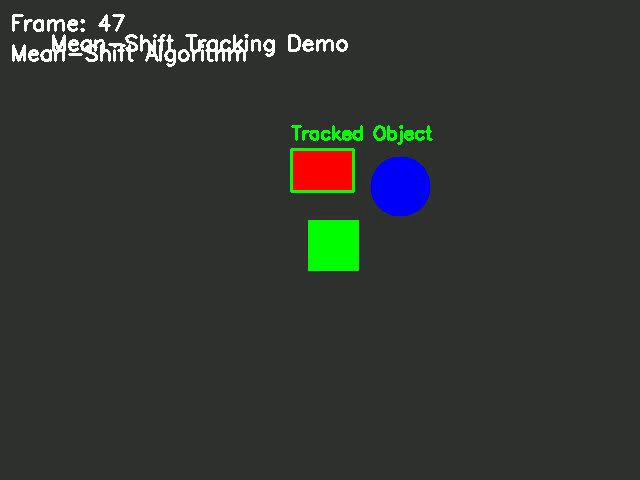

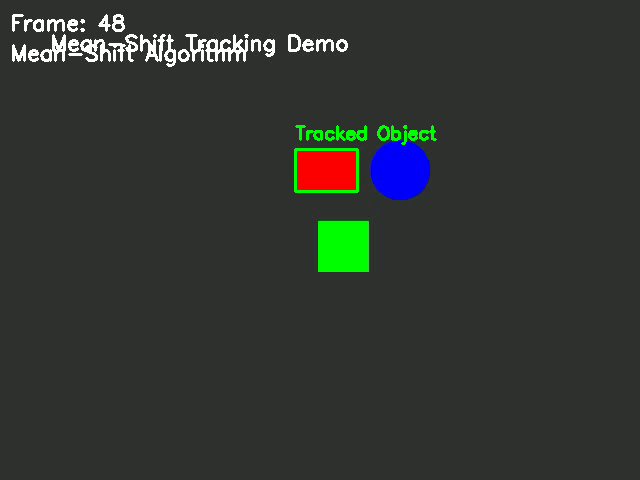

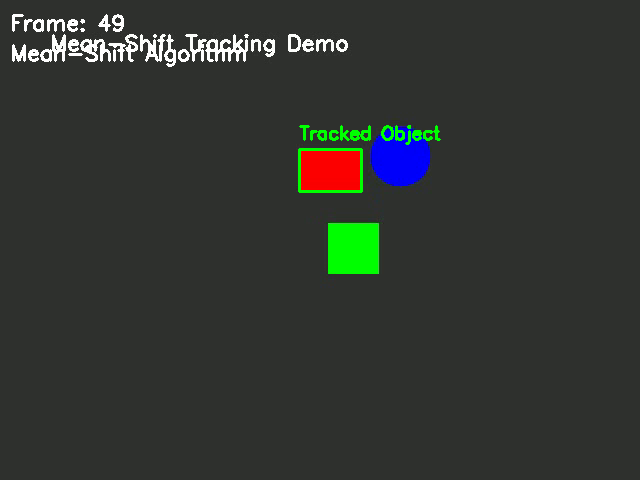

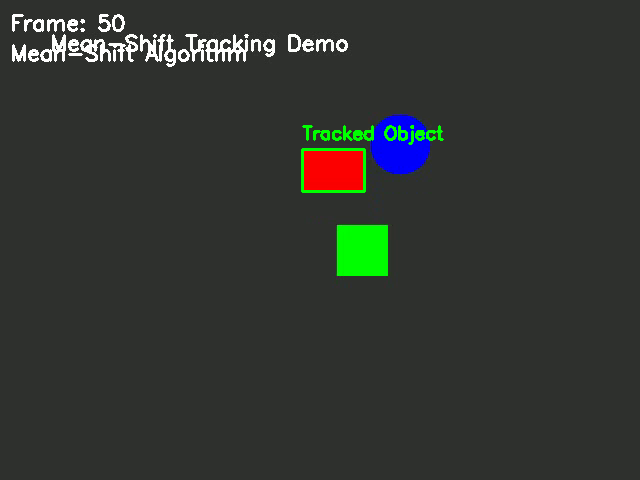

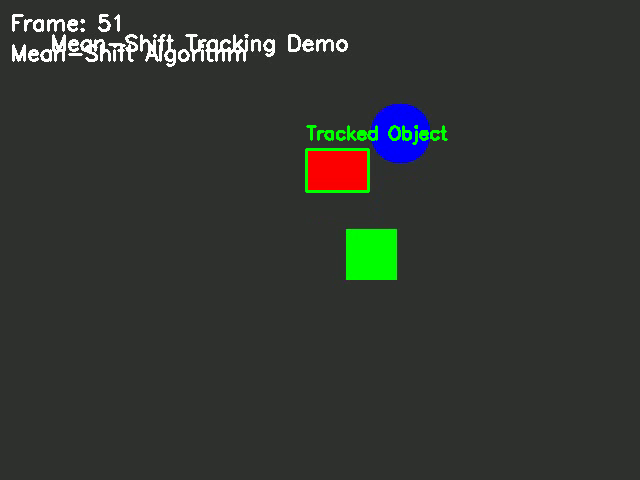

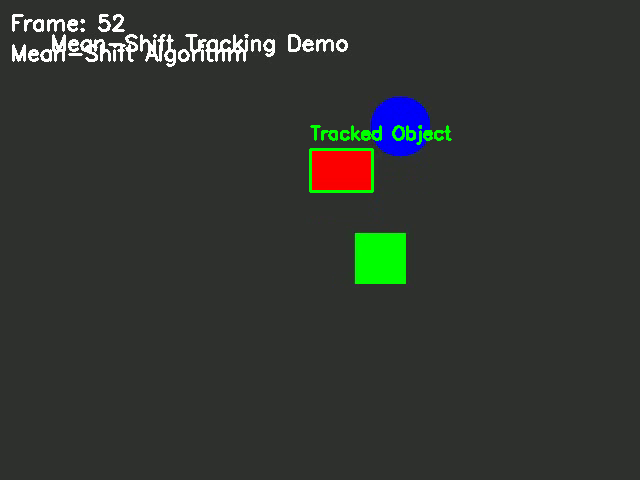

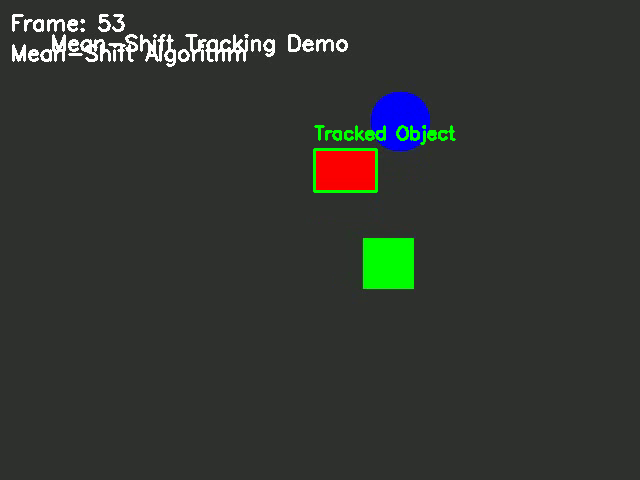

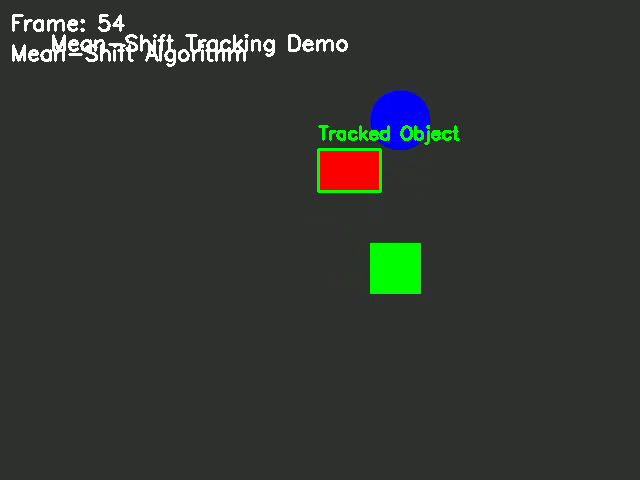

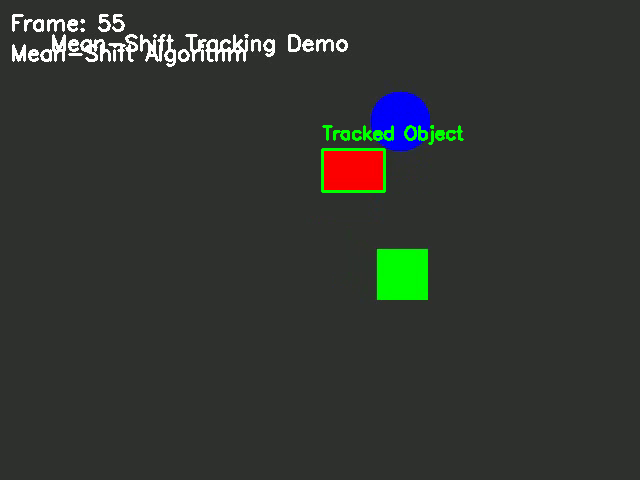

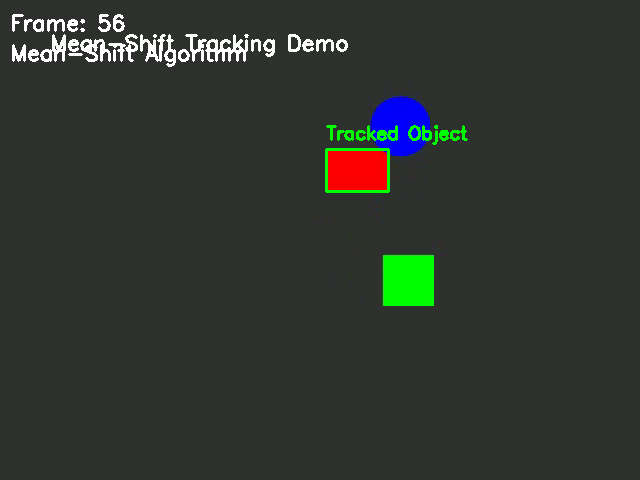

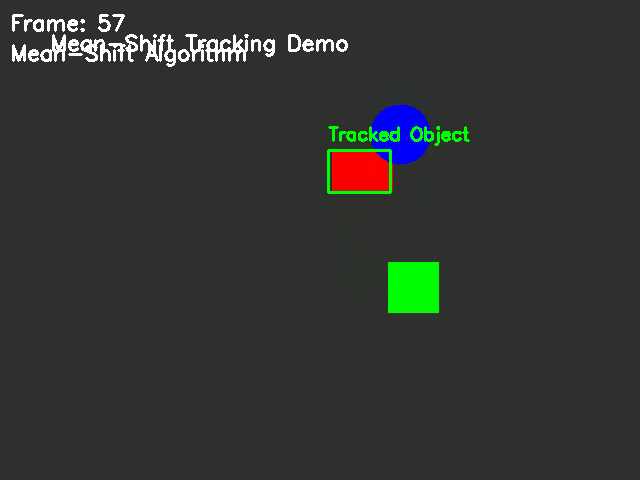

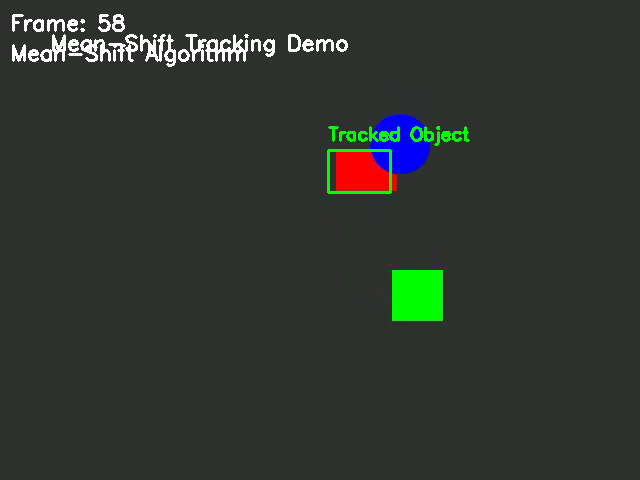

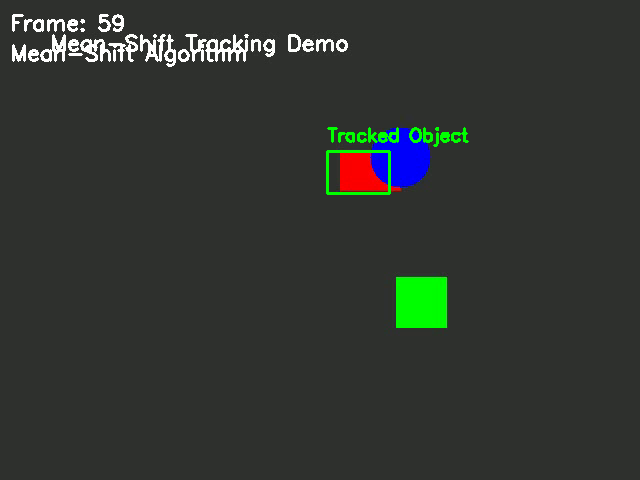

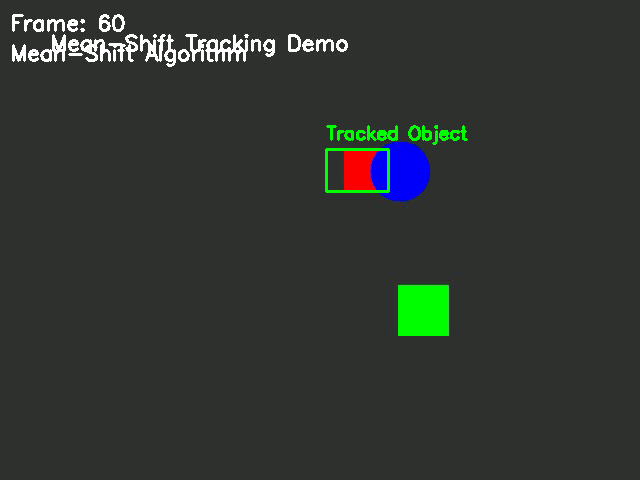

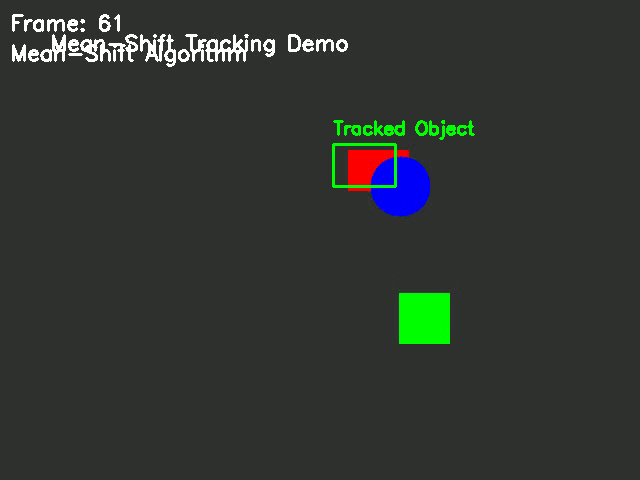

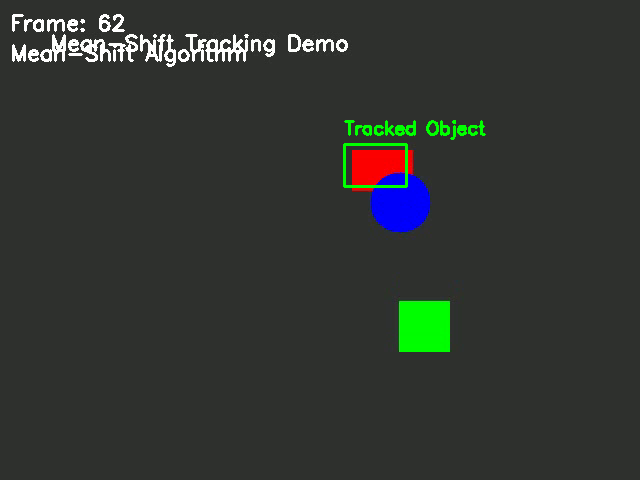

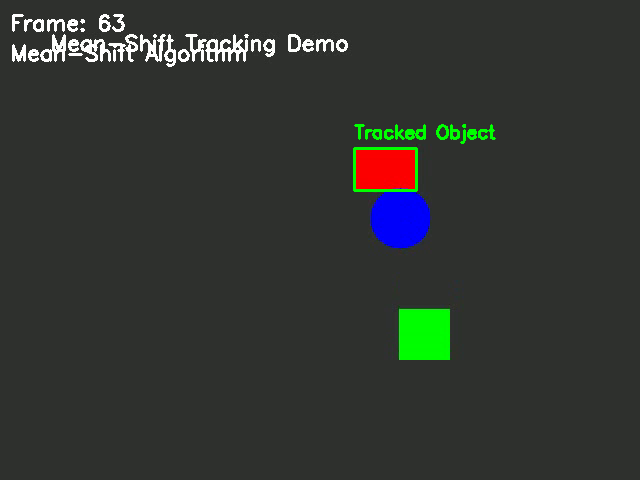

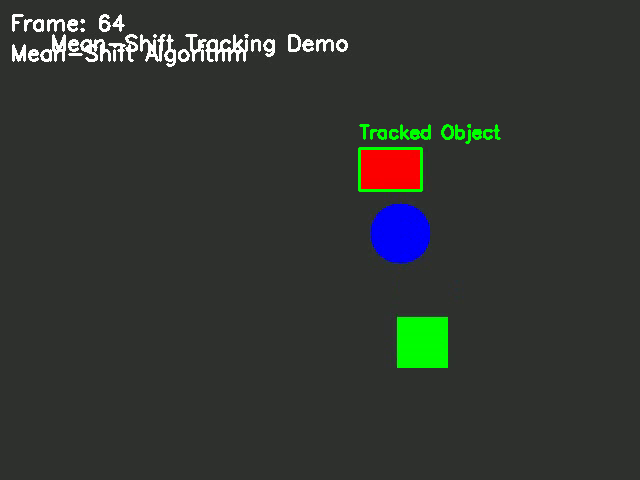

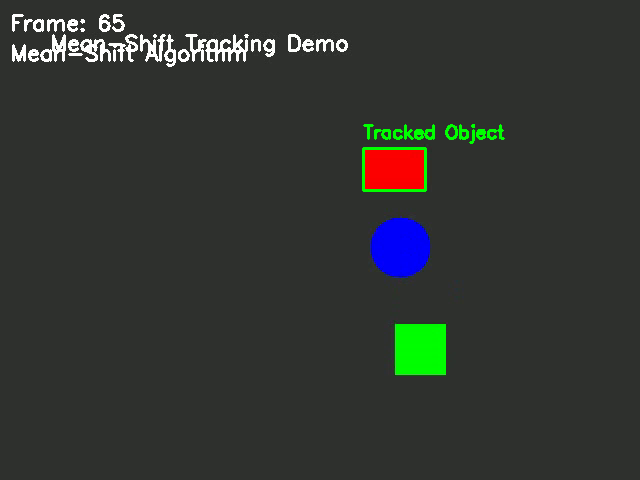

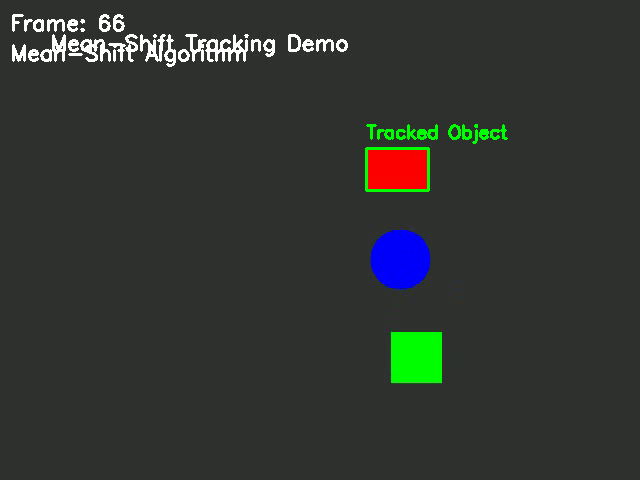

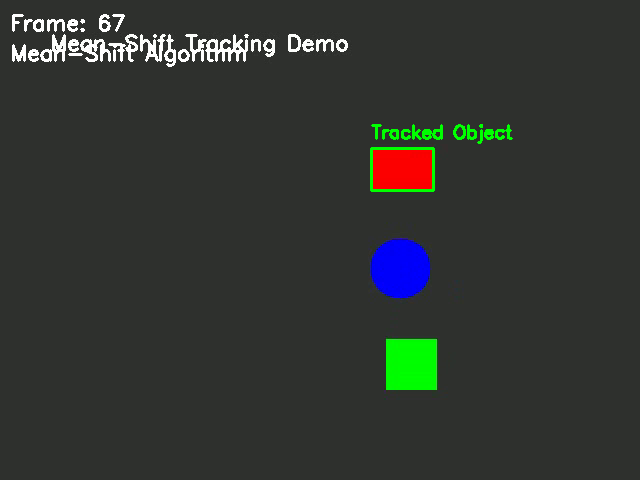

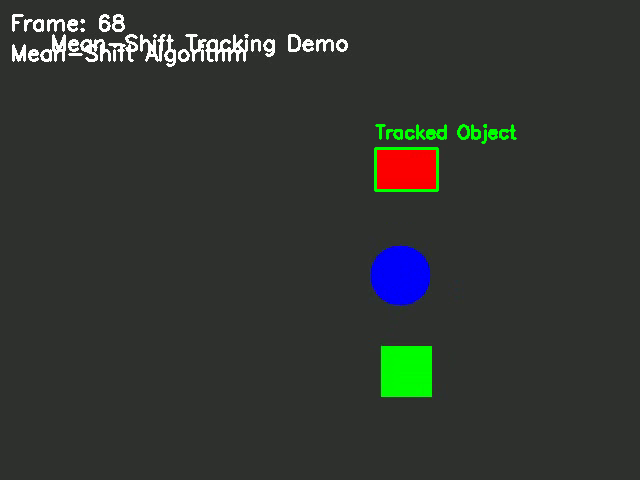

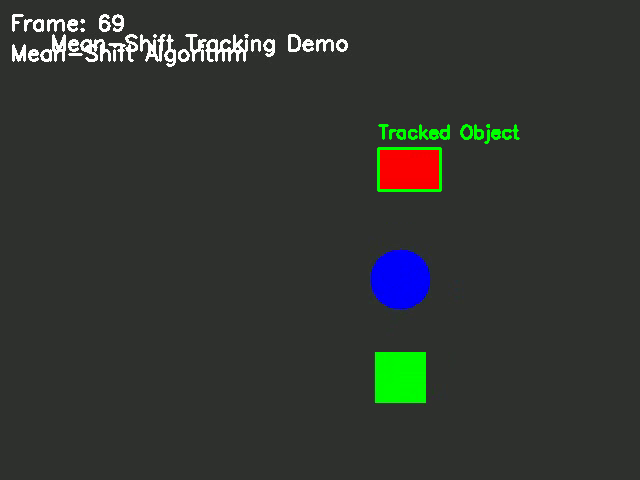

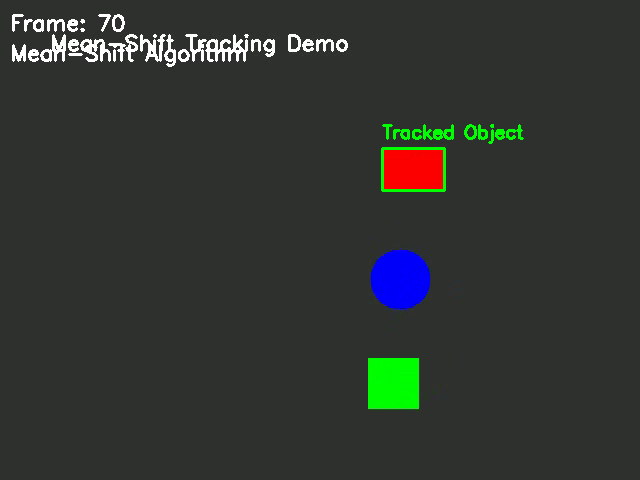

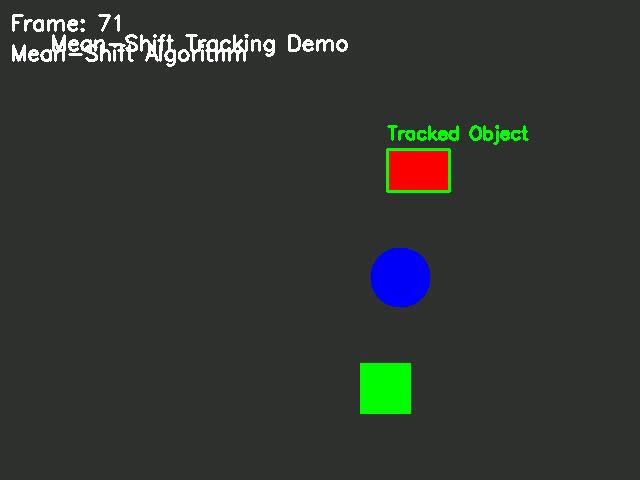

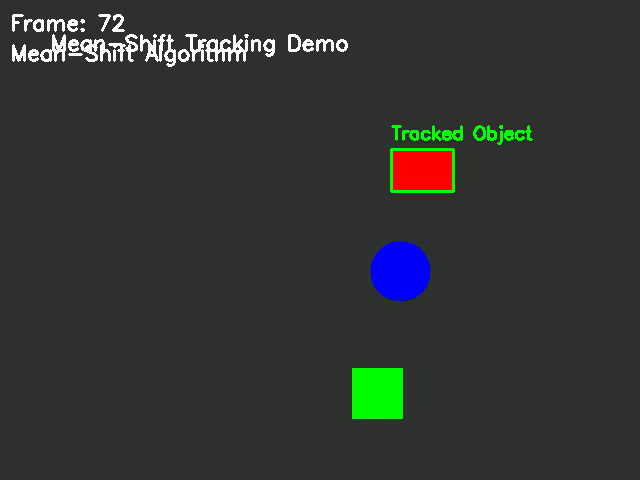

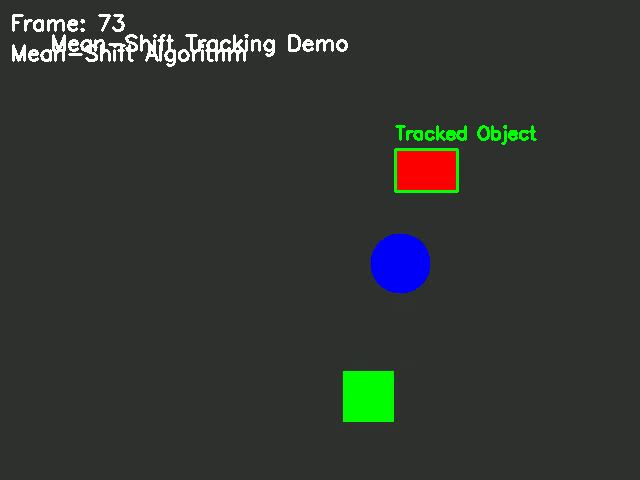

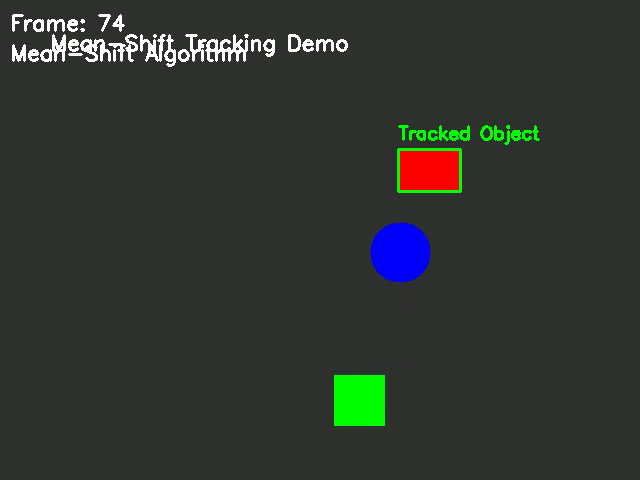

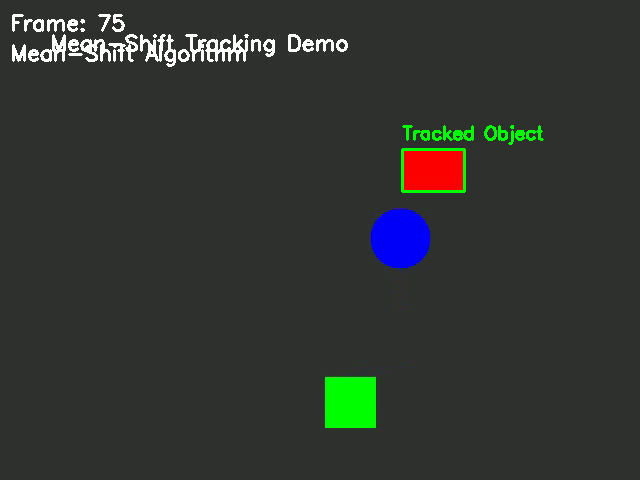

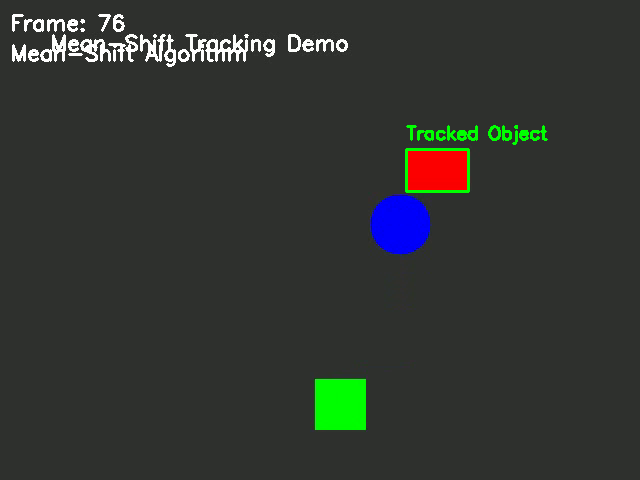

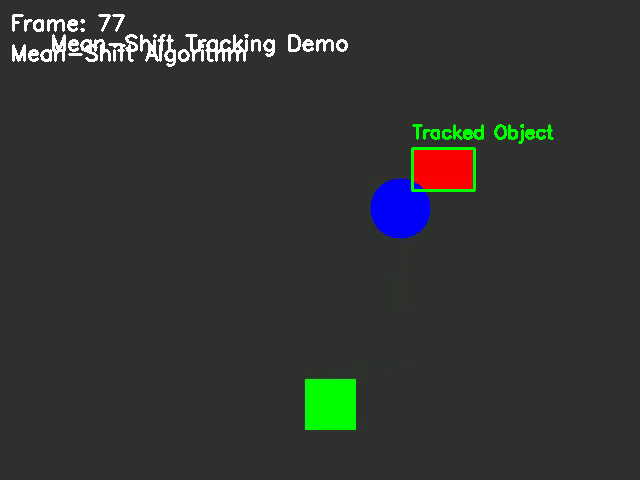

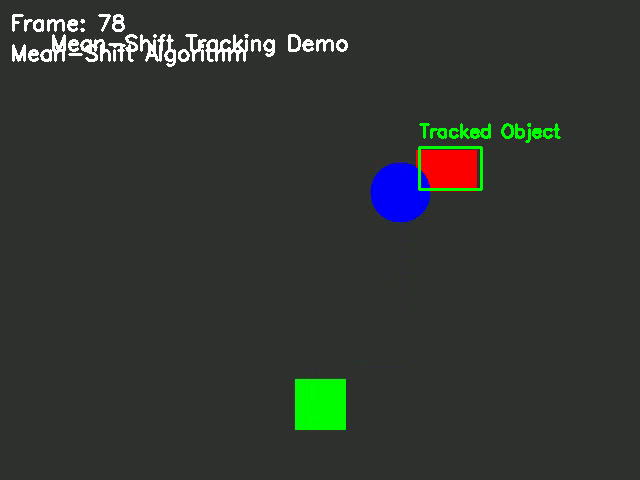

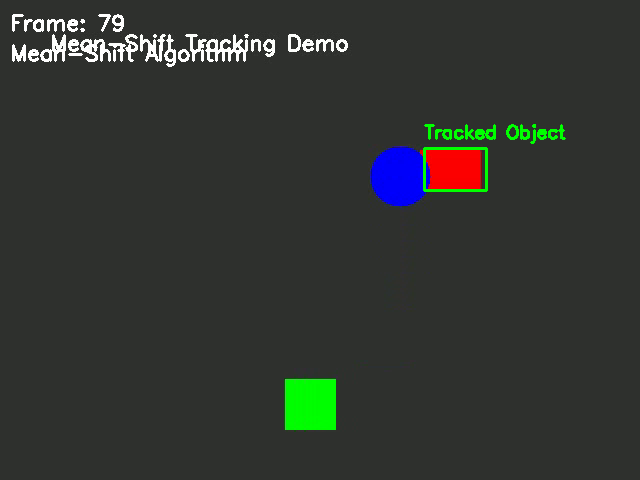

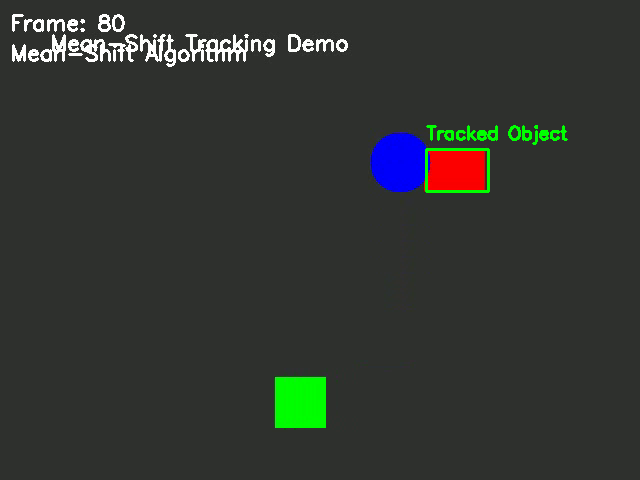

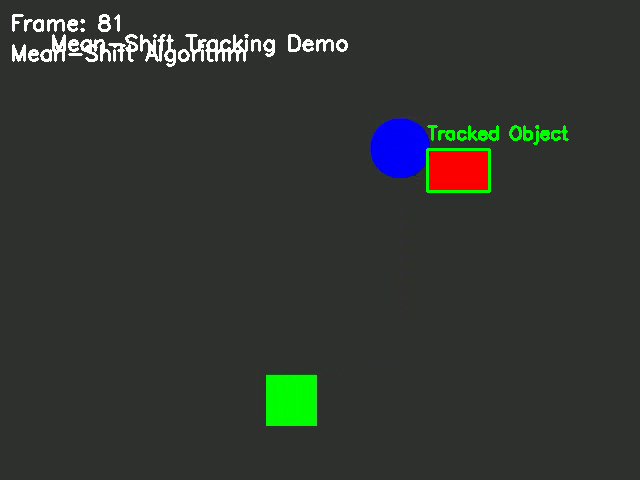

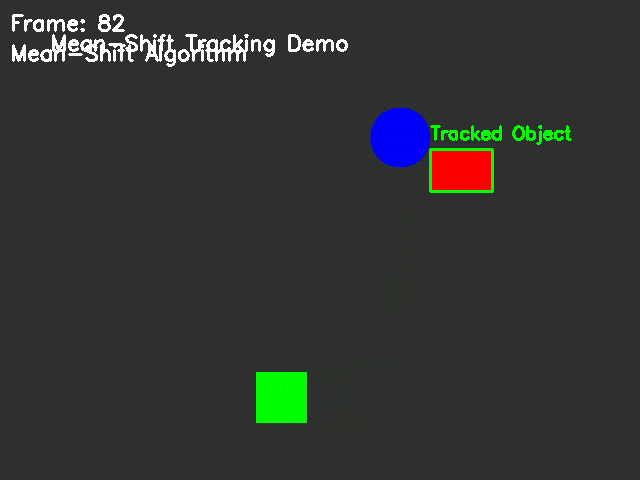

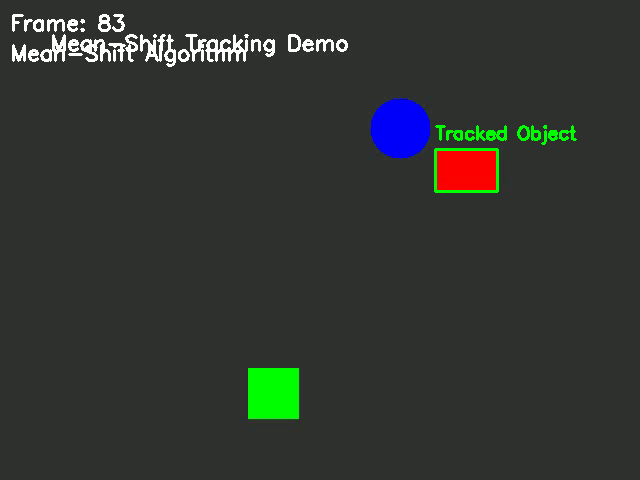

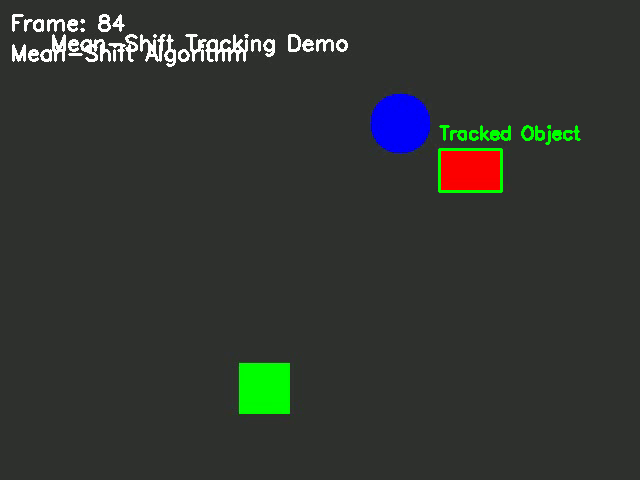

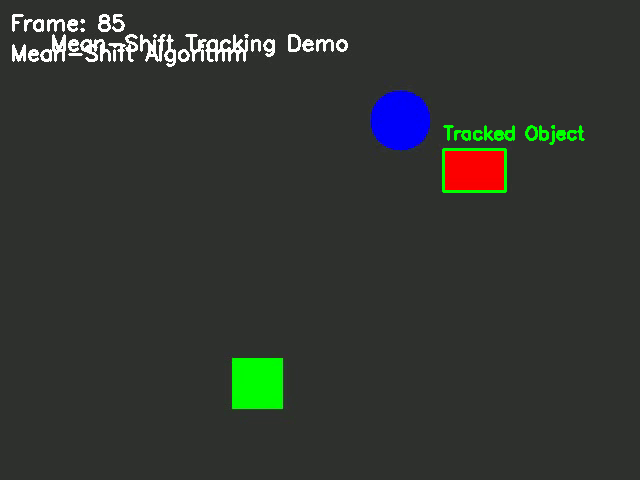

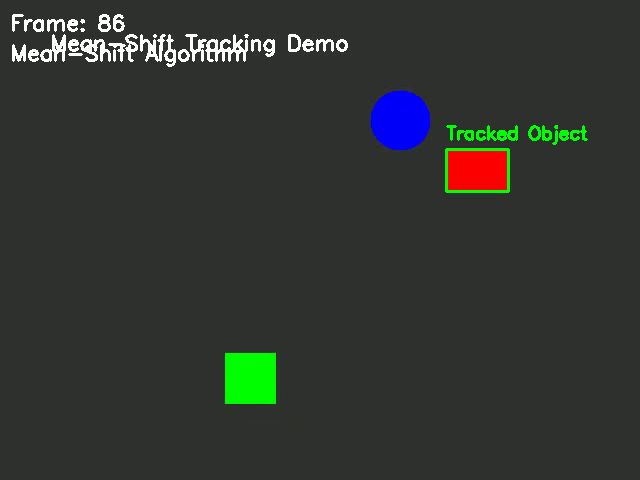

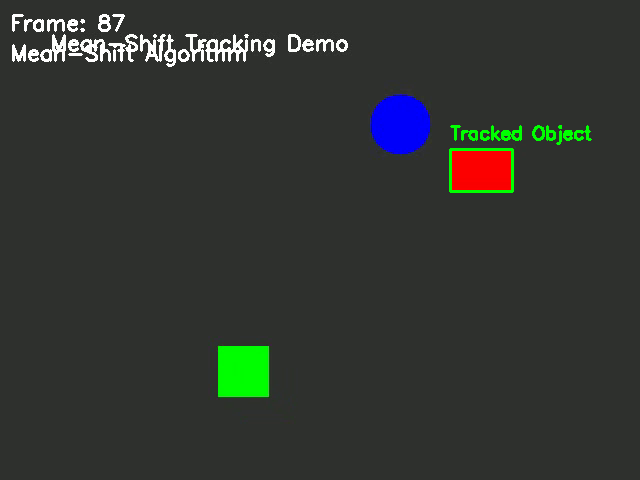

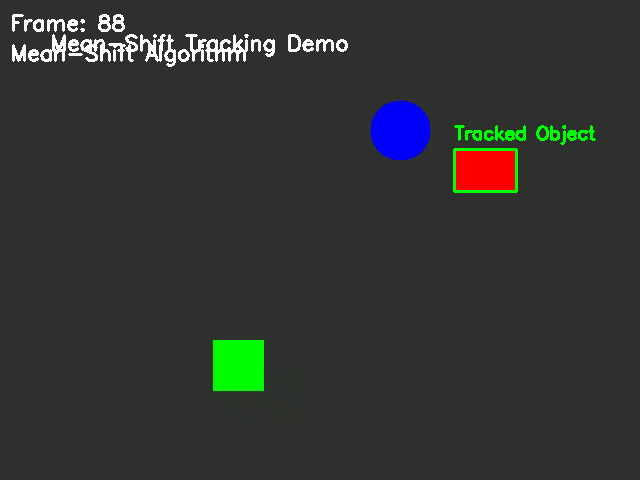

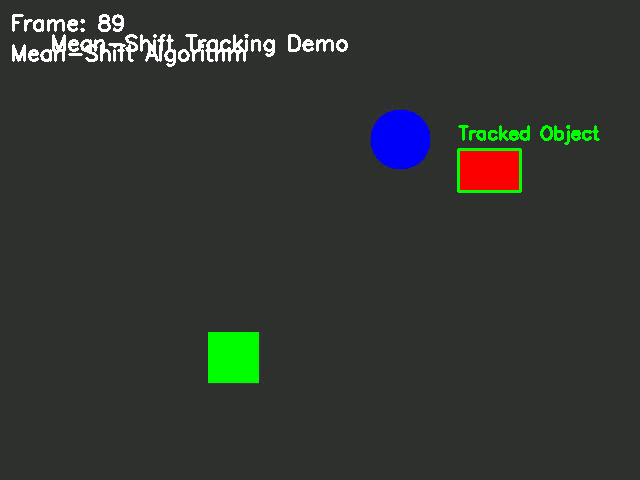

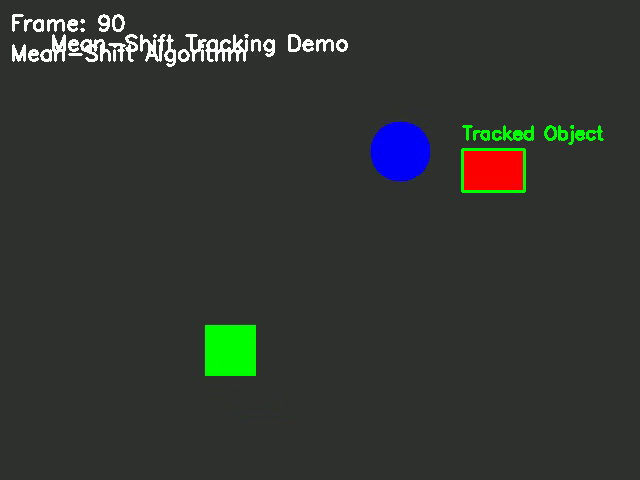

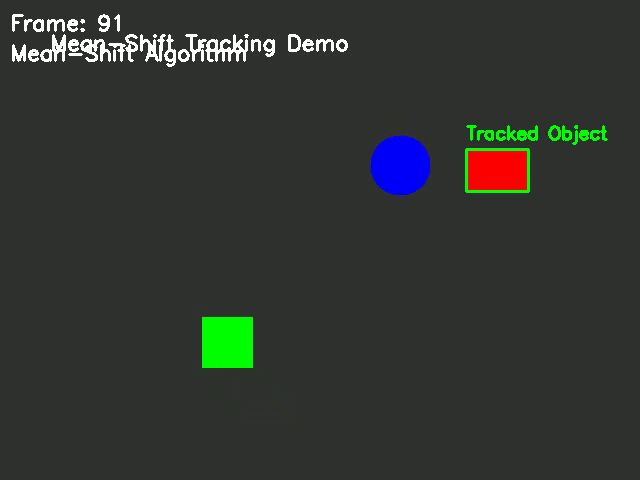

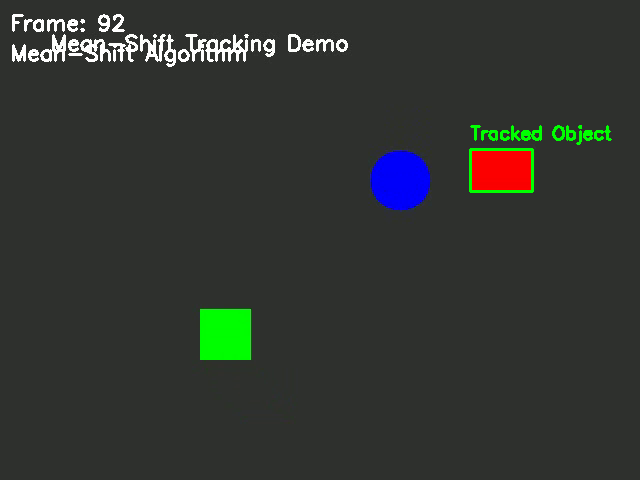

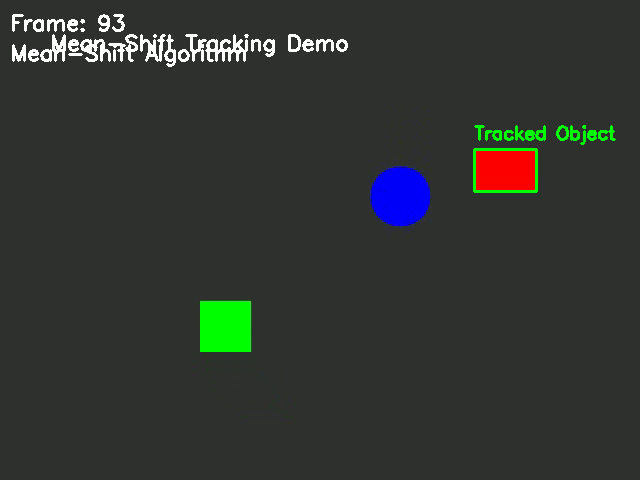

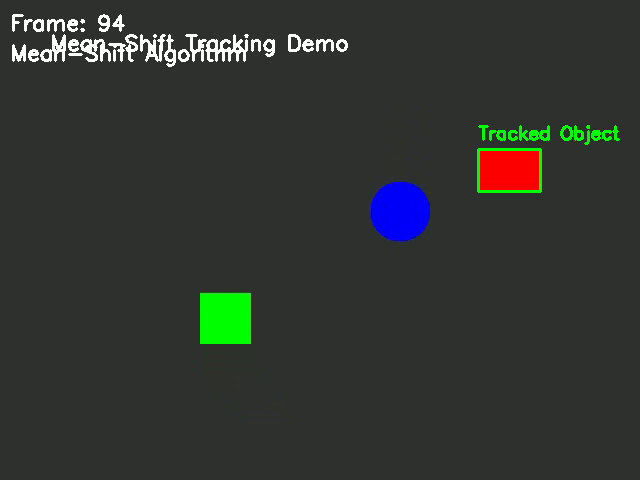

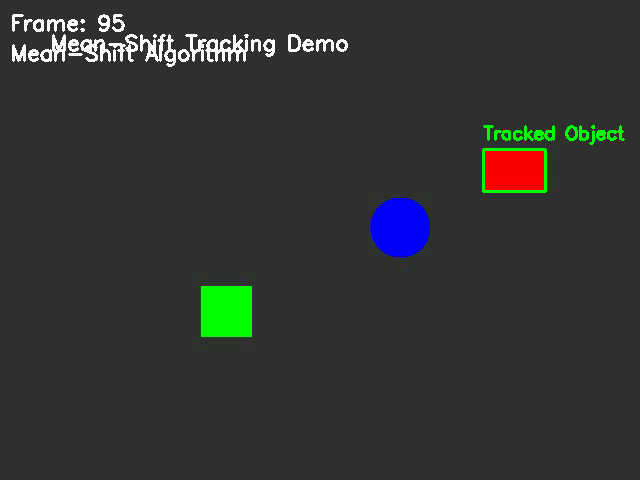

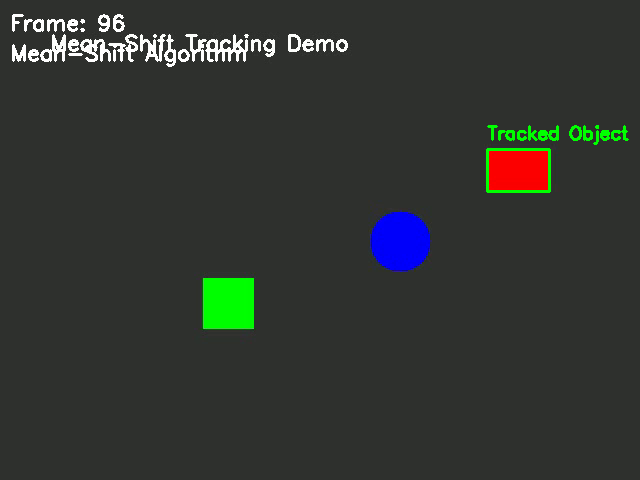

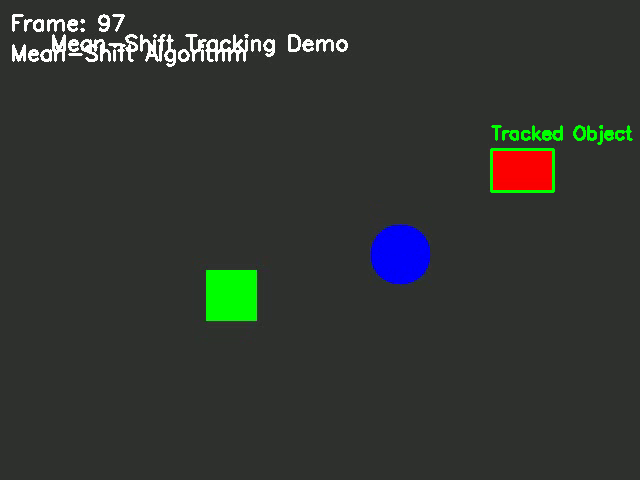

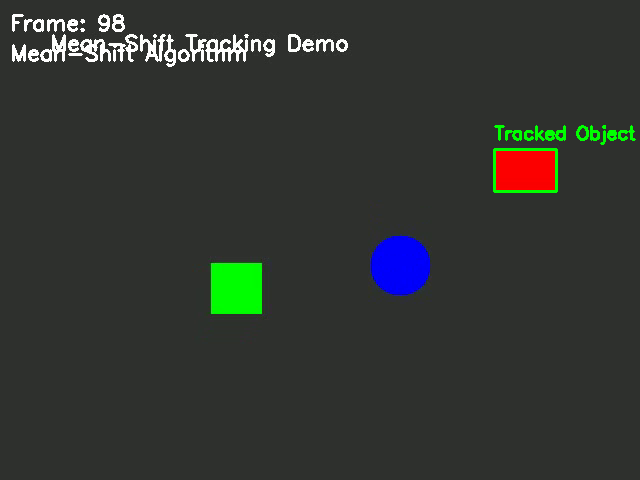

Mean-Shift Tracking completado. Frames procesados: 99


In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Inicializar captura de video
cap = cv2.VideoCapture(video_path)

# Leer primer frame
ret, frame = cap.read()
if not ret:
    print("Error: No se pudo leer el video")
    exit()

# Seleccionar ROI (Region of Interest) manualmente o automáticamente
# Para demo, seleccionamos el objeto rojo automáticamente
hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Definir rango para color rojo (objeto 1)
red_lower = np.array([0, 120, 70])
red_upper = np.array([10, 255, 255])
red_mask = cv2.inRange(hsv_frame, red_lower, red_upper)

# Encontrar contornos del objeto rojo
contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
if contours:
    # Tomar el contorno más grande
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    track_window = (x, y, w, h)
else:
    # Si no encuentra rojo, seleccionar manualmente
    track_window = (100, 150, 60, 40)  # Coordenadas del objeto rojo

# Configurar ROI para tracking
roi = frame[y:y+h, x:x+w]
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Crear máscara y histograma del ROI
mask = cv2.inRange(hsv_roi, red_lower, red_upper)
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Criterio de terminación para Mean-Shift
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

print("Iniciando Mean-Shift Tracking...")
frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Calcular back projection basado en el histograma del ROI
    dst = cv2.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)

    # Aplicar Mean-Shift para obtener nueva posición
    ret, track_window = cv2.meanShift(dst, track_window, term_crit)

    # Dibujar el rectángulo de seguimiento
    x, y, w, h = track_window
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(frame, "Tracked Object", (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Mostrar información
    cv2.putText(frame, f"Frame: {frame_count}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
    cv2.putText(frame, "Mean-Shift Algorithm", (10, 60),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Mostrar resultado
    cv2_imshow( frame)
    frame_count += 1

    # Salir con 'q'
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
print(f"Mean-Shift Tracking completado. Frames procesados: {frame_count}")
